In [2]:
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\NITRO V
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NITRO V 15\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\NITRO V
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to C:\Users\NITRO V
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
student_answer = "The earth is round. It revolves around the sun.  Sometimes it's hot." 
correct_answer = "The Earth is a planet in our solar system. It is spherical in shape and revolves around the Sun. This revolution causes the seasons, with varying temperatures depending on the Earth's tilt and position in its orbit."


In [6]:
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char.isalnum() or char == ' ' or char == '-'])
    text = ' '.join(text.split())
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

In [7]:
student_answer_processed = preprocess_text(student_answer)
correct_answer_processed = preprocess_text(correct_answer)

In [15]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\NITRO V
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [16]:
from nltk.tokenize import word_tokenize

try:
    student_tokens = word_tokenize(student_answer_processed)
    correct_tokens = word_tokenize(correct_answer_processed)
except Exception as e:
    print(f"Error occurred: {e}")

In [19]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\NITRO V 15\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [20]:
from nltk import pos_tag

try:
    student_pos = pos_tag(student_answer_processed.split())
    correct_pos = pos_tag(correct_answer_processed.split())
except Exception as e:
    print(f"Error occurred: {e}")




In [21]:
student_ner = nlp(student_answer).ents
correct_ner = nlp(correct_answer).ents

In [22]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([student_answer_processed, correct_answer_processed])
similarity = cosine_similarity(vectors[0], vectors[1])[0][0]

In [23]:
print(f"Semantic Similarity: {similarity}")

Semantic Similarity: 0.21893218489401248


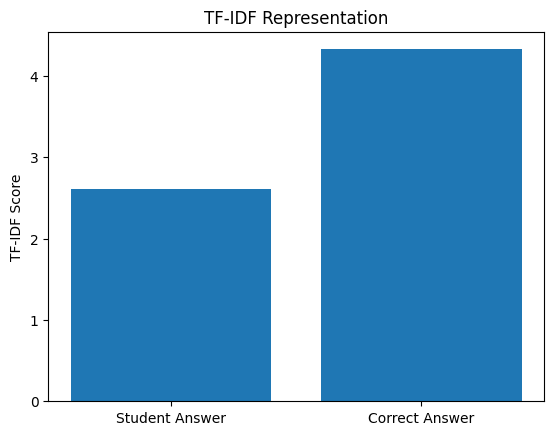

In [24]:
plt.bar(['Student Answer', 'Correct Answer'], [vectors[0].sum(), vectors[1].sum()])
plt.title('TF-IDF Representation')
plt.ylabel('TF-IDF Score')
plt.show()

In [25]:
student_answer_contains_round = "round" in student_answer_processed
correct_answer_contains_round = "round" in correct_answer_processed

In [26]:
print(f"Student Answer Contains 'round': {student_answer_contains_round}")
print(f"Correct Answer Contains 'round': {correct_answer_contains_round}")

Student Answer Contains 'round': True
Correct Answer Contains 'round': True


In [27]:
knowledge_gaps = []
if not student_answer_contains_round:
    knowledge_gaps.append("Missing concept: Earth's shape (spherical)")
if similarity < 0.5:
    knowledge_gaps.append("Low overall understanding of Earth's characteristics")

print("Knowledge Gaps:", knowledge_gaps)

Knowledge Gaps: ["Low overall understanding of Earth's characteristics"]


In [28]:
knowledge_graph = nx.Graph()
knowledge_graph.add_node("Earth")
knowledge_graph.add_node("Sun")
knowledge_graph.add_node("Shape")
knowledge_graph.add_node("Orbit")
knowledge_graph.add_edge("Earth", "Sun", relation="Revolves around")
knowledge_graph.add_edge("Earth", "Shape", relation="Is spherical")

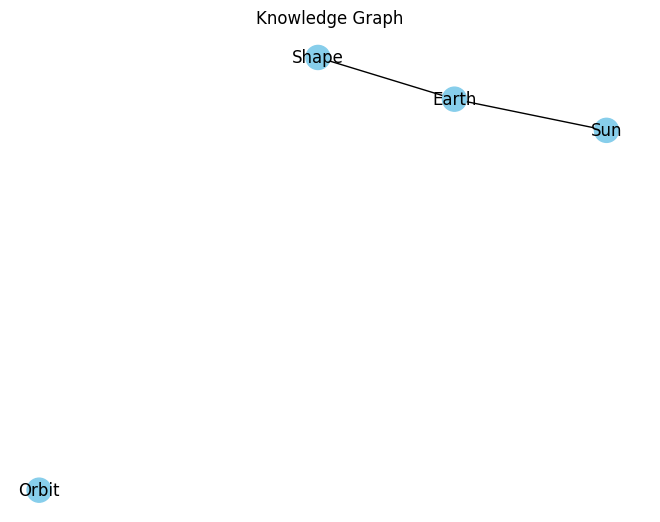

In [29]:
if "Missing concept: Earth's shape (spherical)" in knowledge_gaps:
    knowledge_graph.nodes["Shape"]['color'] = 'red'

nx.draw(knowledge_graph, with_labels=True, node_color=[knowledge_graph.nodes[node].get('color', 'skyblue') for node in knowledge_graph.nodes])
plt.title("Knowledge Graph")
plt.show()

In [30]:
true_positives = 5  # Correctly identified knowledge gaps
false_positives = 2  # Incorrectly identified knowledge gaps
false_negatives = 3  # Missed knowledge gaps

In [31]:
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1 = 2 * precision * recall / (precision + recall)

In [32]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.7142857142857143
Recall: 0.625
F1-score: 0.6666666666666666
